In [1]:
import easyocr
import re
import cv2
from tqdm.notebook import tqdm
from datetime import datetime
from tools.frame_detector import FrameDetector
from matplotlib import pyplot as plt
import matplotlib.patches as patches


In [2]:
file_name = "test/samples/sample_episode.mp4"
vidcap = cv2.VideoCapture(file_name)
success, image = vidcap.read()
fps = vidcap.get(cv2.CAP_PROP_FPS)
frame_count = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
h, w, _ = image.shape


In [ ]:
frames = []

pbar = tqdm(total=frame_count)
count = 0
while(success):
    if count % (2 * fps) == 0:  # every 2 seconds
        success, image = vidcap.read()

        # get frame timestamp
        timestamp = vidcap.get(cv2.CAP_PROP_POS_MSEC) / 1000
        timestamp = datetime.fromtimestamp(timestamp).strftime('%M:%S')
        
        if image is not None:
            image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            frames.append(timestamp, image[h//2:h, w//2:w])

    else:
        ret = vidcap.grab()
    count += 1
    # pbar.update(1)
# pbar.close()

In [5]:
detector = FrameDetector(frames)
detector.detect()
# print(f"{detector.found=}")

100%|██████████| 1559/1559 [01:39<00:00, 15.63it/s]

detector.found=[(1373, [[280, 138], [336, 138], [336, 170], [280, 170]], '2.00', 0.9765257239341736), (1470, [[280, 138], [336, 138], [336, 170], [280, 170]], '2.00', 0.9766212701797485), (1471, [[280, 138], [336, 138], [336, 170], [280, 170]], '2.00', 0.9757879972457886), (1472, [[280, 138], [336, 138], [336, 170], [280, 170]], '2.00', 0.9764188528060913), (1404, [[280, 72], [336, 72], [336, 104], [280, 104]], '1:00', 0.5260469913482666), (87, [[128, 162], [182, 162], [182, 192], [128, 192]], '1.00', 0.767864465713501), (88, [[128, 72], [182, 72], [182, 104], [128, 104]], '1.00', 0.5675072073936462), (405, [[128, 162], [182, 162], [182, 192], [128, 192]], '1.00', 0.9577692151069641), (767, [[128, 162], [182, 162], [182, 192], [128, 192]], '1.00', 0.7735087871551514), (768, [[128, 74], [182, 74], [182, 104], [128, 104]], '1.00', 0.8181162476539612), (1044, [[128, 162], [182, 162], [182, 192], [128, 192]], '1.00', 0.7639825940132141), (1045, [[128, 130], [182, 130], [182, 162], [128, 16

(1373, [[280, 138], [336, 138], [336, 170], [280, 170]], '2.00', 0.9765257239341736)
(1470, [[280, 138], [336, 138], [336, 170], [280, 170]], '2.00', 0.9766212701797485)
(1471, [[280, 138], [336, 138], [336, 170], [280, 170]], '2.00', 0.9757879972457886)
(1472, [[280, 138], [336, 138], [336, 170], [280, 170]], '2.00', 0.9764188528060913)
(1404, [[280, 72], [336, 72], [336, 104], [280, 104]], '1:00', 0.5260469913482666)
(87, [[128, 162], [182, 162], [182, 192], [128, 192]], '1.00', 0.767864465713501)
(88, [[128, 72], [182, 72], [182, 104], [128, 104]], '1.00', 0.5675072073936462)
(405, [[128, 162], [182, 162], [182, 192], [128, 192]], '1.00', 0.9577692151069641)
(767, [[128, 162], [182, 162], [182, 192], [128, 192]], '1.00', 0.7735087871551514)
(768, [[128, 74], [182, 74], [182, 104], [128, 104]], '1.00', 0.8181162476539612)
(1044, [[128, 162], [182, 162], [182, 192], [128, 192]], '1.00', 0.7639825940132141)
(1045, [[128, 130], [182, 130], [182, 162], [128, 162]], '1.00', 0.701114773750

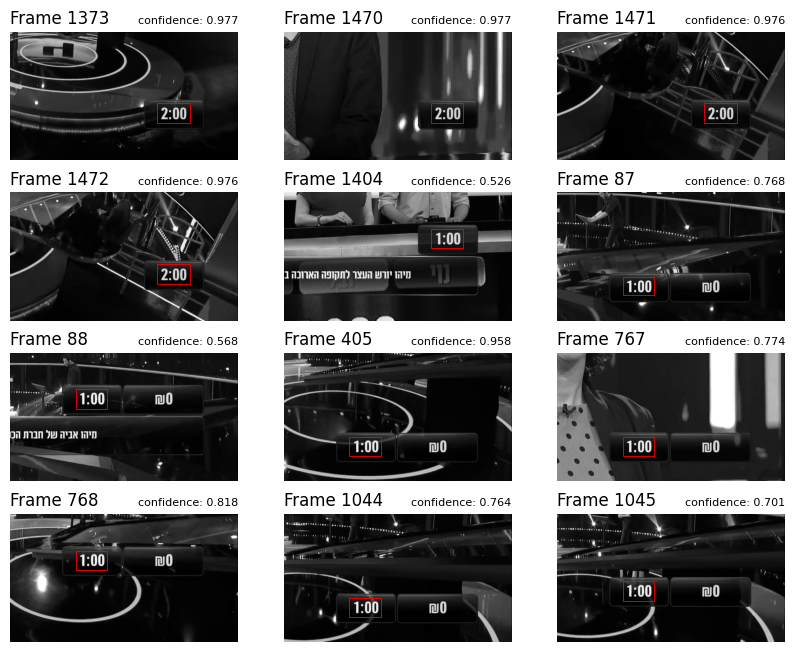

In [8]:
fig, axs = plt.subplots(4, 3, figsize=(10,8))
axs = axs.flatten()
for i, frame in enumerate(detector.found):
    if i >= 12:
        break
    x1, y1 = frame[1][0]
    x2, y2 = frame[1][2]
    w, h = x2 - x1, y2 - y1
    axs[i].axis('off')   
    axs[i].set_title(f"Frame {frame[0]}", loc="left")
    axs[i].set_title("confidence: {:.3}".format(frame[3]), fontsize=8, loc="right")
    rect = patches.Rectangle((x1 - 5, y1 - 5), w + 5, h + 5, linewidth=0.6, edgecolor='r', facecolor='none')
    axs[i].add_patch(rect)
    axs[i].imshow(frames[frame[0]], cmap="gray")

    

In [7]:
vidcap.release()